In [137]:
import pandas as pd
import numpy as np
import time

In [132]:
financial_securitie = {
    "id":'BS_AM',
    "timestamp":1581717368.347977,
    "Synthetic_index":100,
    "owner":"Alex Méndez",
    "entity":"banco santander",
    "underlying_securities":[
        {
            "id":0,
            "type":"ACCION",
            "price":70,
            "weight":5
        },
        { 
            "id":1,
            "type":"DEUDA",
            "price":100,
            "weight":15
        }
        ]
}
peticion = {
    "VF":"0",
    "idAS":1,
    "precio":90

}
coll.insert(financial_securitie)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


ObjectId('5e4918b68dbb46c2fb90ef76')

In [97]:
def calculate_synthetic_index(precio_peticion,precio_antiguo,peso,indice_sintetico_inicial):
    """
    Funcion que recibe 4 parametros para calcular el indice sintetico al actualizar el precio:
    - precio_peticion: precio al que se actualiza
    - precio_antiguo: precio antes de la actualizacion
    - peso de la accion
    - indice sintetico inical
    """
    Rit = (precio_peticion/precio_antiguo)-1
    Rt = peso*Rit
    isf = indice_sintetico_inicial*(1-Rt)
    return isf

In [98]:
def update_financial_securitie(financial_securitie,peticion):    
    activos = financial_securitie["activos_subyacentes"]
    isi = financial_securitie["Synthetic_index"]
    p_peticion = peticion["price"]
    for i in range(len(activos)):
        if activos[i]["id"]== peticion["idAS"]:
            peso = activos[i]["weight"]
            indice_sintetico_final = calculate_synthetic_index(p_peticion,activos[i]["precio"],peso,isi)
            activos[i]['price'] = p_peticion
            fs_final = {
                        "id":financial_securitie["id"]+1,
                        "timestamp":time.time(),
                        "Synthetic_index":indice_sintetico_final,
                        "owner":"pepe",
                        "entity":"banco santander",
                        "underlying_securities":activos
                        }
            return fs_final
fs_final = update_financial_securitie(financial_securitie,peticion)
fs_final

{'id': 1,
 'timestamp': 1581840620.3934588,
 'Synthetic_index': 249.99999999999994,
 'dueño': 'pepe',
 'entidad': 'banco santander',
 'activos_subyacentes': [{'id': 0, 'type': 'ACCION', 'precio': 70, 'peso': 5},
  {'id': 1, 'type': 'DEUDA', 'precio': 90, 'peso': 15}]}

In [127]:
peticiones = {
    "0":{
        "id_fs":0,
        "idAS":0,
        "price":90  
    },
    "1":{1:2}
}
for i in range(len(peticiones)):
    print(peticiones[str(i)])

{'id_fs': 0, 'idAS': 0, 'price': 90}
{1: 2}


In [100]:
def calculate_Rt(activos,peticiones):
    Rt = 0
    for ind in range(len(peticiones)):
        for i in range(len(activos)):
            if activos[i]["id"]==peticiones[ind]["idAS"]:
                rit=(peticiones[ind]["price"]/activos[i]["price"])-1
                Rt+=activos[i]["weight"]*rit
                activos[i]["price"] = peticiones[ind]["price"]
        return Rt, activos

In [101]:
Rt,activos = calculate_Rt(financial_securitie["activos_subyacentes"],peticiones)
si = 100*(1+Rt)
    

In [102]:
def update_financial_securitie_2(financial_securitie,peticion):    
    activos = financial_securitie["underlying_securities"]
    isi = financial_securitie["Synthetic_index"]
    p_peticion = peticion["price"]
    
    Rt,activos = calculate_Rt(financial_securitie["underlying_securities"],peticiones)
    si = isi*(1+Rt)
    
    fs_final = {
                "id":financial_securitie["id"]+1,
                "timestamp":time.time(),
                "Synthetic_index":si,
                "owner":"pepe",
                "entity":"banco santander",
                "underlying_securities":activos
                }
    return fs_final
fs_final = update_financial_securitie_2(financial_securitie,peticion)
fs_final

{'id': 1,
 'timestamp': 1581840623.570646,
 'Synthetic_index': 100.0,
 'dueño': 'pepe',
 'entidad': 'banco santander',
 'activos_subyacentes': [{'id': 0, 'type': 'ACCION', 'precio': 90, 'peso': 5},
  {'id': 1, 'type': 'DEUDA', 'precio': 90, 'peso': 15}]}

In [103]:
from pymongo import MongoClient
import os
from dotenv import load_dotenv
load_dotenv()

#Get Password
connection = os.getenv('URLMONGO')
#Connect to DB
client = MongoClient(connection)
def connectCollection(database, collection):
    db = client[database]
    coll = db[collection]
    return db, coll

In [104]:
db,coll = connectCollection('ets_factory','financial_securities')

In [113]:
coll.insert(financial_securitie)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5e48fdeb8dbb46c2fb90ef75')

In [114]:
list(coll.find({}))

[{'_id': ObjectId('5e48f9028dbb46c2fb90ef73'),
  'id': 0,
  'timestamp': 1581717368.347977,
  'Synthetic_index': 100,
  'dueño': 'pepe',
  'entidad': 'banco santander',
  'activos_subyacentes': [{'id': 0, 'type': 'ACCION', 'precio': 90, 'peso': 5},
   {'id': 1, 'type': 'DEUDA', 'precio': 90, 'peso': 15}]},
 {'_id': ObjectId('5e48fdc78dbb46c2fb90ef74'),
  'id': 0,
  'timestamp': 1581717368.347977,
  'Synthetic_index': 100,
  'owner': 'pepe',
  'entity': 'banco santander',
  'underlying_securities': [{'id': 0,
    'type': 'ACCION',
    'price': 70,
    'weight': 5},
   {'id': 1, 'type': 'DEUDA', 'price': 100, 'weight': 15}]},
 {'_id': ObjectId('5e48fdeb8dbb46c2fb90ef75'),
  'id': 0,
  'timestamp': 1581717368.347977,
  'Synthetic_index': 100,
  'owner': 'Alex Méndez',
  'entity': 'banco santander',
  'underlying_securities': [{'id': 0,
    'type': 'ACCION',
    'price': 70,
    'weight': 5},
   {'id': 1, 'type': 'DEUDA', 'price': 100, 'weight': 15}]}]

In [129]:
financial_securitie = list(coll.find({'id':peticiones[0]["id_fs"]}))[-1]

KeyError: 0

In [120]:
financial_securitie

{'_id': ObjectId('5e48fdeb8dbb46c2fb90ef75'),
 'id': 0,
 'timestamp': 1581717368.347977,
 'Synthetic_index': 100,
 'owner': 'Alex Méndez',
 'entity': 'banco santander',
 'underlying_securities': [{'id': 0,
   'type': 'ACCION',
   'price': 70,
   'weight': 5},
  {'id': 1, 'type': 'DEUDA', 'price': 100, 'weight': 15}]}

In [123]:
peticiones[0]['idAS']

0

In [128]:
    financial_securitie = list(coll.find({'id':peticiones[key]["id_fs"]}))
    financial_securitie


[{'_id': ObjectId('5e48fdeb8dbb46c2fb90ef75'),
  'id': 0,
  'timestamp': 1581717368.347977,
  'Synthetic_index': 100,
  'owner': 'Alex Méndez',
  'entity': 'banco santander',
  'underlying_securities': [{'id': 0,
    'type': 'ACCION',
    'price': 70,
    'weight': 5},
   {'id': 1, 'type': 'DEUDA', 'price': 100, 'weight': 15}]}]

In [136]:
from flask import request
def uploadjson():
    upload    = request.files.get('upload')
    print('==============>UPLOAD',upload.filename)
    if upload == None or upload.filename == '':
        return 'Error no image'
    name, ext = os.path.splitext(upload.filename)
    if ext not in ('.json'):
        return 'Error'
    upload.save('/upload.json') # appends upload.filename automatically
    return '/upload.json'

In [229]:
db,coll = connectCollection('ets_factory','financial_securities')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
import webbrowser


In [231]:
BS_financial = list(coll.find({'id':'BS_AM'}))
BS_financial[0].get('entity')

'banco santander'

In [232]:
BS_financial = list(coll.find({'id':'BS_AM'}))
sinthetic_index = []
time = []
for i in range(len(BS_financial)):
    timestamp = BS_financial[i]['timestamp']
    time.append((timestamp))
    sinthetic_index.append(BS_financial[i]['Synthetic_index'])
print(sinthetic_index)
print(time)


[100, 242.8571428571429, 269.84126984126976, 240.51069703243613, 173.70217007898162, 122.61329652633995, 84.29664136185872, 168.5932827237174, 215.42475014697226, 158.73402642408476, 246.91959665968744, 246.91959665968744, 246.91959665968744, 246.91959665968744, 246.91959665968744]
[1581717368.347977, 1581972000.92179, 1581972062.6805649, 1581972089.433912, 1581972128.37584, 1581972152.0448792, 1581972166.048724, 1581972174.76077, 1581972182.1972811, 1581972190.750176, 1581972421.18331, 1581972460.914551, 1581973011.1712599, 1582044493.636564, 1582050106.8101828]


In [233]:
time =[dt.datetime.fromtimestamp(ts) for ts in time]

True

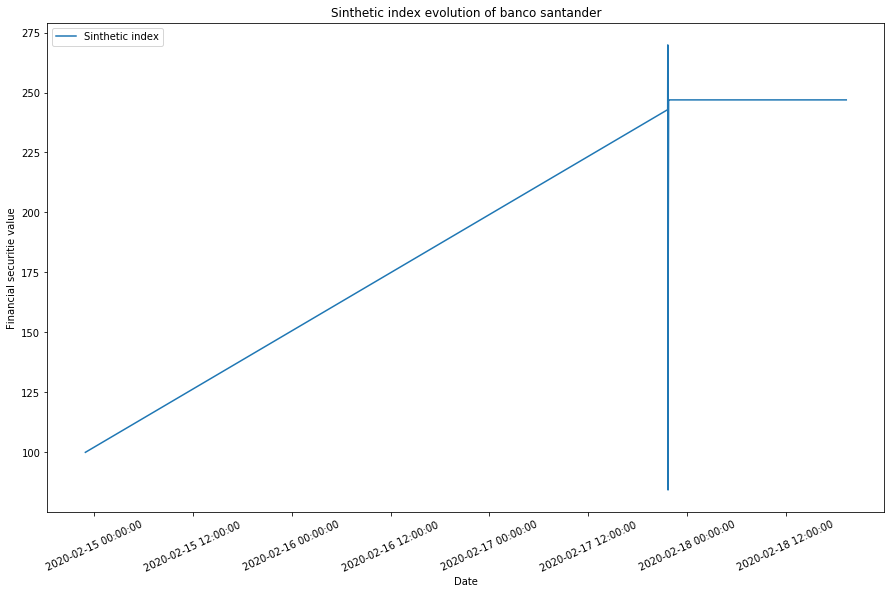

In [234]:
entity = BS_financial[0].get('entity')
plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(time,sinthetic_index)
plt.legend(['Sinthetic index'],loc ="upper left")
plt.ylabel('Financial securitie value')
plt.xlabel('Date')
plt.title(f'Sinthetic index evolution of {entity}')
plt.savefig('plot.png')


AttributeError: module 'os' has no attribute 'startfile'

In [ ]:
@app.route('/line')
def line():
    financial = list(coll.find({'id':'BS_AM'}))
    sinthetic_index = []
    time = []
    for i in range(len(financial)):
        timestamp = financial[i]['timestamp']
        time.append((timestamp))
        sinthetic_index.append(BS_financial[i]['Synthetic_index'])
    line_labels=time
    line_values=sinthetic_index
    return render_template('line_chart.html', title='yeeeha', max=max(linevalues)+100, labels=line_labels, values=line_values)